In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import bullet, dataset, distance, error, speed, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
data = dataset.load_trajectory(898, 1376323154598)
head, tail = split.split_trajectory_with_overlap(data, 0.5)

# print(head[-10:], '\n\n', tail[:10])

In [3]:
speed.calculate_speed_in_ms(head[-2], head[-1])

3.5287690365045834

In [4]:
head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = bullet.bullet_prediction(head, 3)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

600.6931269940324
10.476923186800311


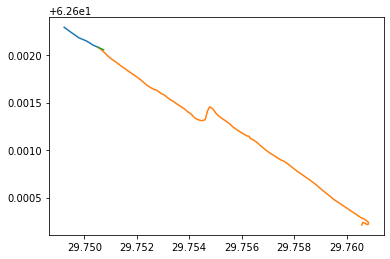

600.6931269940324
10.476923186800311


In [5]:
head_y, head_x = head_y[-10:], head_x[-10:]
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

In [6]:
errors = error.calculate_error_vector(tail, prediction)
print(errors[:, 4])

[0.         3.94623877]


In [7]:
SECONDS = 3
USER_ID = 898
RATIO = 0.75
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory = dataset.load_trajectory(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, RATIO)
    prediction = bullet.bullet_prediction(head, SECONDS)

    if np.size(prediction, 0) < 2:
        failed += 1
        print(' failed')
        continue

    pred_dist = distance.calculate_trajectory_length_in_meters(prediction)

    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4 and pred_dist > 0:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        print(' success', pred_dist, len(error_amount), sum(error_amount))
        errors.append(error_amount)
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    '\nERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictions\t', failed
)


1399399033400 failed
1412515702026 failed
1413382616849 success 18.045578682604383 2 1.9948163104789793
1379951571859 success 2.9285212213281575 2 1.167352830410981
1379694392068 success 13.612205801578549 2 4.051370614521197
1407168712392 success 11.623248137502802 2 1.9940782354866795
1400436362445 success 16.11392047717887 2 3.0679631733774366
1407593205810 success 19.156232974893285 2 3.9378407502782022
1396953544784 success 6.501058641403634 2 2.4276599078926444
1408208026280 success 22.56784427323423 2 3.0531935669814514
1404054152819 success 8.484315174772489 2 6.259669992933937
1401891357857 success 18.589643265343284 2 1.951180265056731
1394042416405 success 6.797839235165696 2 0.27897268897347605
1380211927794 success 2.6517891702646863 2 2.945032245410806
1377681725292 success 7.457836380537587 2 2.301462853401468
1397840479593 success 142.07568286709673 2 9.080898429603467
1398930716368 success 17.53378235921644 2 1.8360270779959957
1396260541459 success 15.730523570448272 

1379302234528 failed
1412417616700 success 9.079034983315427 2 5.680596810000339
1378141680529 success 3.092383920036976 2 3.507607290570098
1404389296311 success 16.949039349393935 2 11.641480132669123
1377503869598 success 7.477653415338631 2 3.8552259228493186
1405012891914 failed
1399295150237 failed
1393786760018 success 12.501470876605634 2 5.695959138980069
1404392752815 failed
1411315645320 success 15.4427929791601 2 1.0020628505530658
1376290443974 success 9.261619874992425 2 0.5924600388583421
1377635831718 success 14.137742172259879 2 4.842039752932773
1402152998236 success 13.419703651831439 2 4.27996854666587
1408282645285 success 14.21566782512579 2 1.5926054807603236
1382112227576 success 5.732750341822166 2 1.6011533171792722
1399288094423 success 16.525232464008276 2 1.9618624155553812
1377888285591 success 11.231951398301838 2 3.9496784169835517
1418503545224 success 2.7021455963091827 2 4.066600988065706
1384830483229 success 6.647048124865859 2 6.0123778377393835
13